In [41]:
import wfdb
import os
import matplotlib.pyplot as plt
import pywt
import numpy as np

In [21]:
data_root = "../data/raw/ecg-id-database-1.0.0"

In [24]:
# Recursive function to find all '.hea' files and read corresponding records
def plot_records_in_directory(directory):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.hea'):
                record_name = os.path.splitext(file)[0]  # remove the '.hea' extension
                record_path = os.path.join(root, record_name)

                # Read the record
                record = wfdb.rdrecord(record_path)

                # Plot the record
                plt.plot(record.p_signal[:, 0], label=f'Record {record_name}')

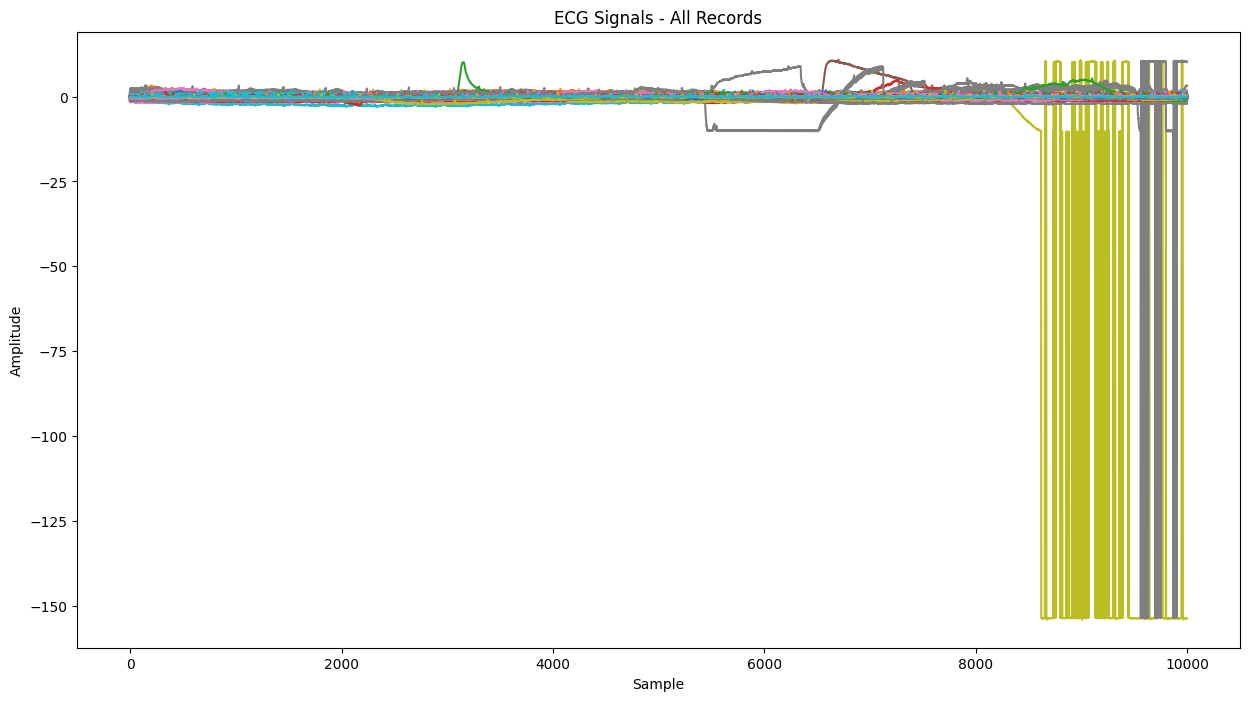

In [26]:
plt.figure(figsize=(15, 8))
plot_records_in_directory(data_root)

plt.title('ECG Signals - All Records')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
# plt.legend()
plt.show()

In [37]:
persons_to_include = ['Person_01', 'Person_02', 'Person_03']

In [29]:
# Recursive function to find all '.hea' files and read corresponding records for a specific person
def plot_records_in_directory(directory, person_name):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.hea'):
                record_name = os.path.splitext(file)[0]  # remove the '.hea' extension
                record_path = os.path.join(root, record_name)

                # Read the record
                record = wfdb.rdrecord(record_path)

                # Plot the record
                plt.plot(record.p_signal[:, 0], label=f'{person_name} - Record {record_name}')

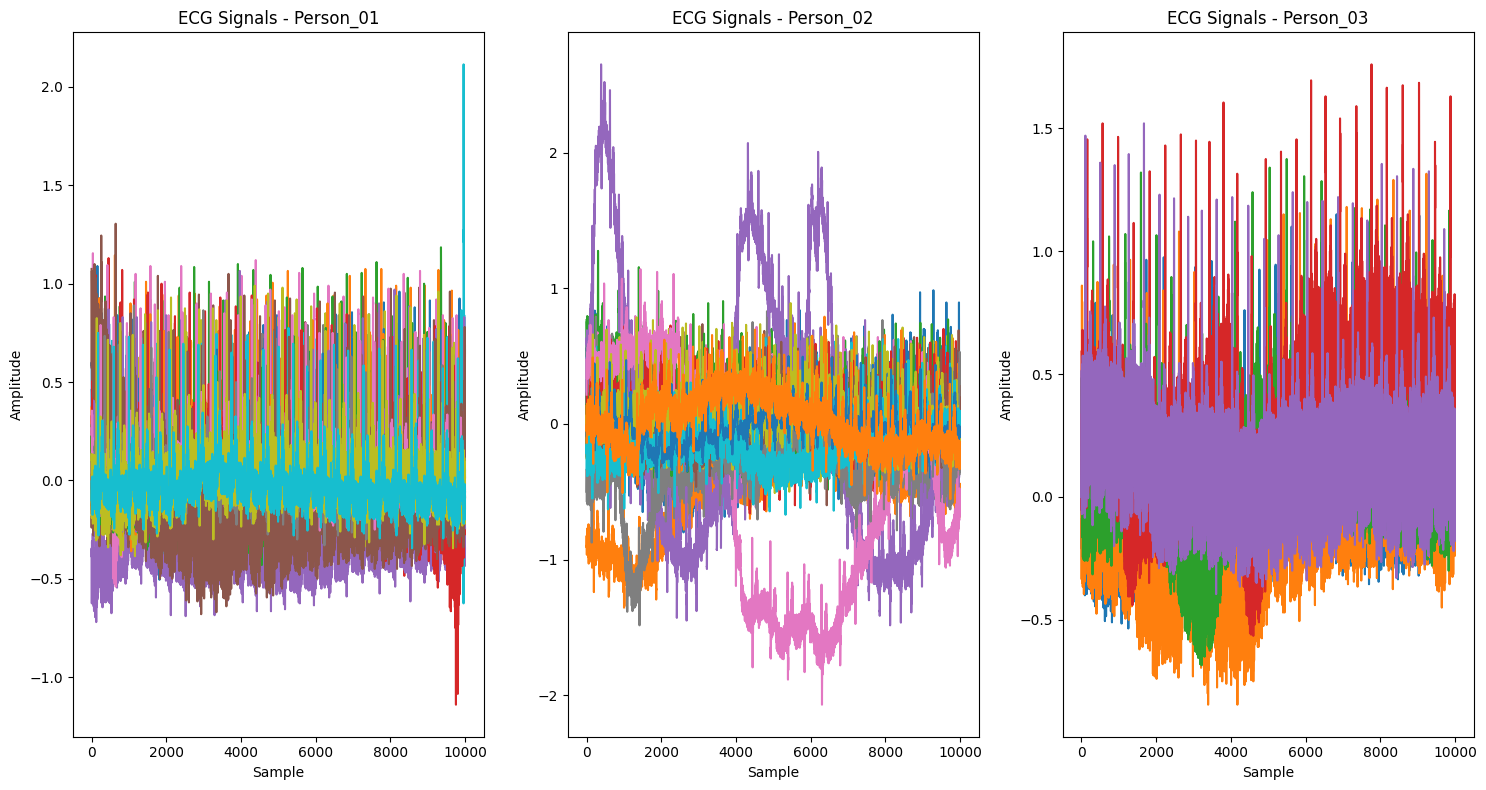

In [39]:
# Plot records for the specified persons
plt.figure(figsize=(15, 8))

for i, person_name in enumerate(persons_to_include, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns, ith subplot
    person_directory = os.path.join(data_root, person_name)

    # Check if the directory for the person exists
    if os.path.exists(person_directory):
        # Plot records for the person
        plot_records_in_directory(person_directory, person_name)

        plt.title(f'ECG Signals - {person_name}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

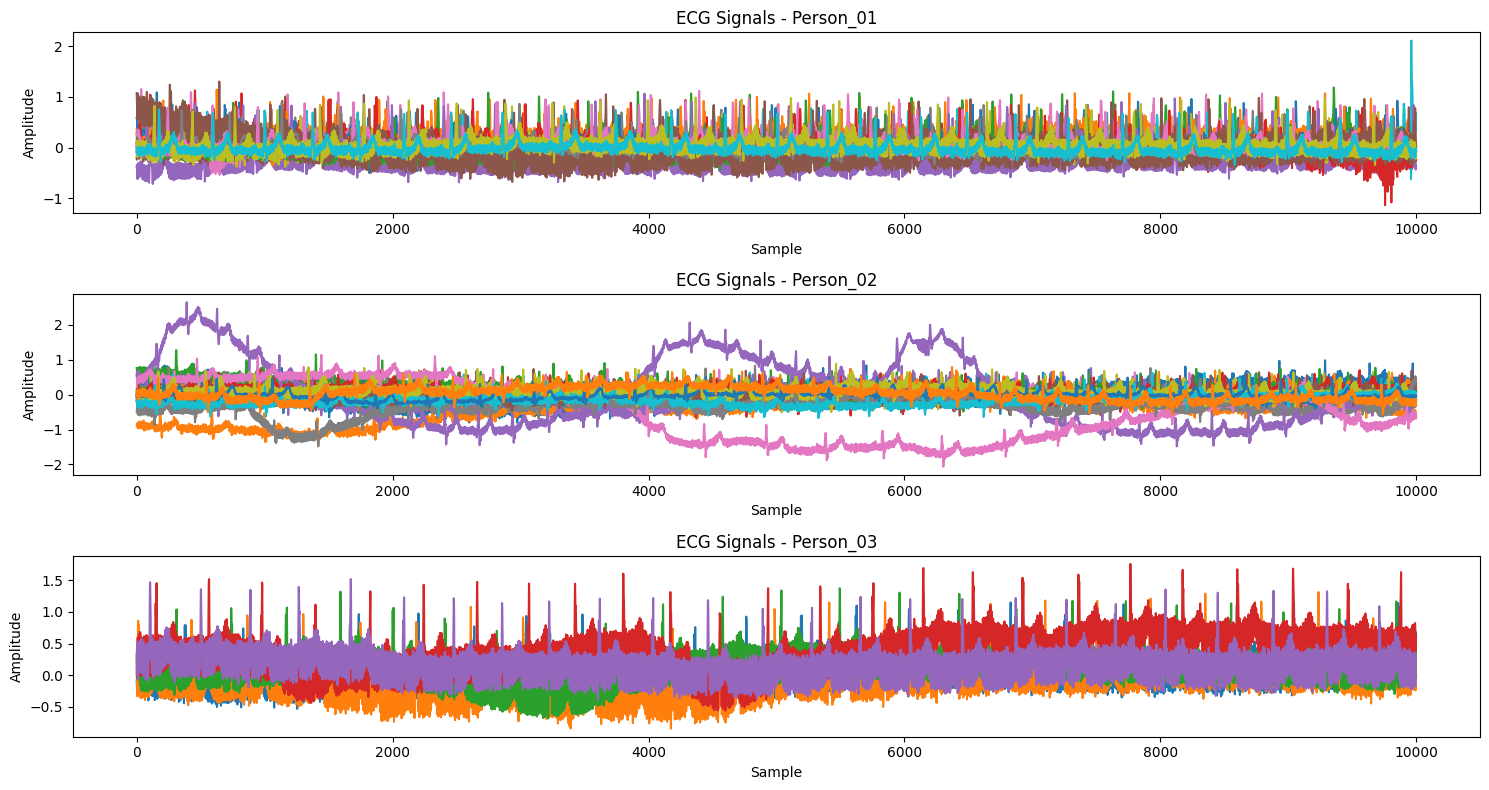

In [47]:
# Plot records for the specified persons
plt.figure(figsize=(15, 8))

for i, person_name in enumerate(persons_to_include, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    person_directory = os.path.join(data_root, person_name)

    # Check if the directory for the person exists
    if os.path.exists(person_directory):
        # Plot records for the person
        plot_records_in_directory(person_directory, person_name)

        plt.title(f'ECG Signals - {person_name}')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [76]:
def plot_and_denoise_records(directory, person_name):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.hea'):
                # record_name = os.path.splitext(file)[0]  # remove the '.hea' extension
                record_name = 'rec_1'
                record_path = os.path.join(root, record_name)

                # Read the record
                record = wfdb.rdrecord(record_path)

                # Denoise the record using wavelet thresholding
                denoised_signal = denoise_signal(record.p_signal[:, 0])

                # Plot the original and denoised signals
                plt.plot(record.p_signal[:, 0], label=f'{person_name} - Original - Record {record_name}', alpha=0.5)
                plt.plot(denoised_signal, label=f'{person_name} - Denoised - Record {record_name}')


def denoise_signal(signal):
    wavelet = 'sym4'
    level = 4
    
    # Decompose the signal
    coeffs = pywt.wavedec(signal, wavelet, level=level)
    
    # A universal threshold based on the noise standard deviation
    threshold = np.sqrt(2 * np.log(len(signal))) * np.std(coeffs[-1])
    
    # Apply wavelet thresholding
    thresholded_coeffs = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_signal = pywt.waverec(thresholded_coeffs, wavelet)
    
    return denoised_signal

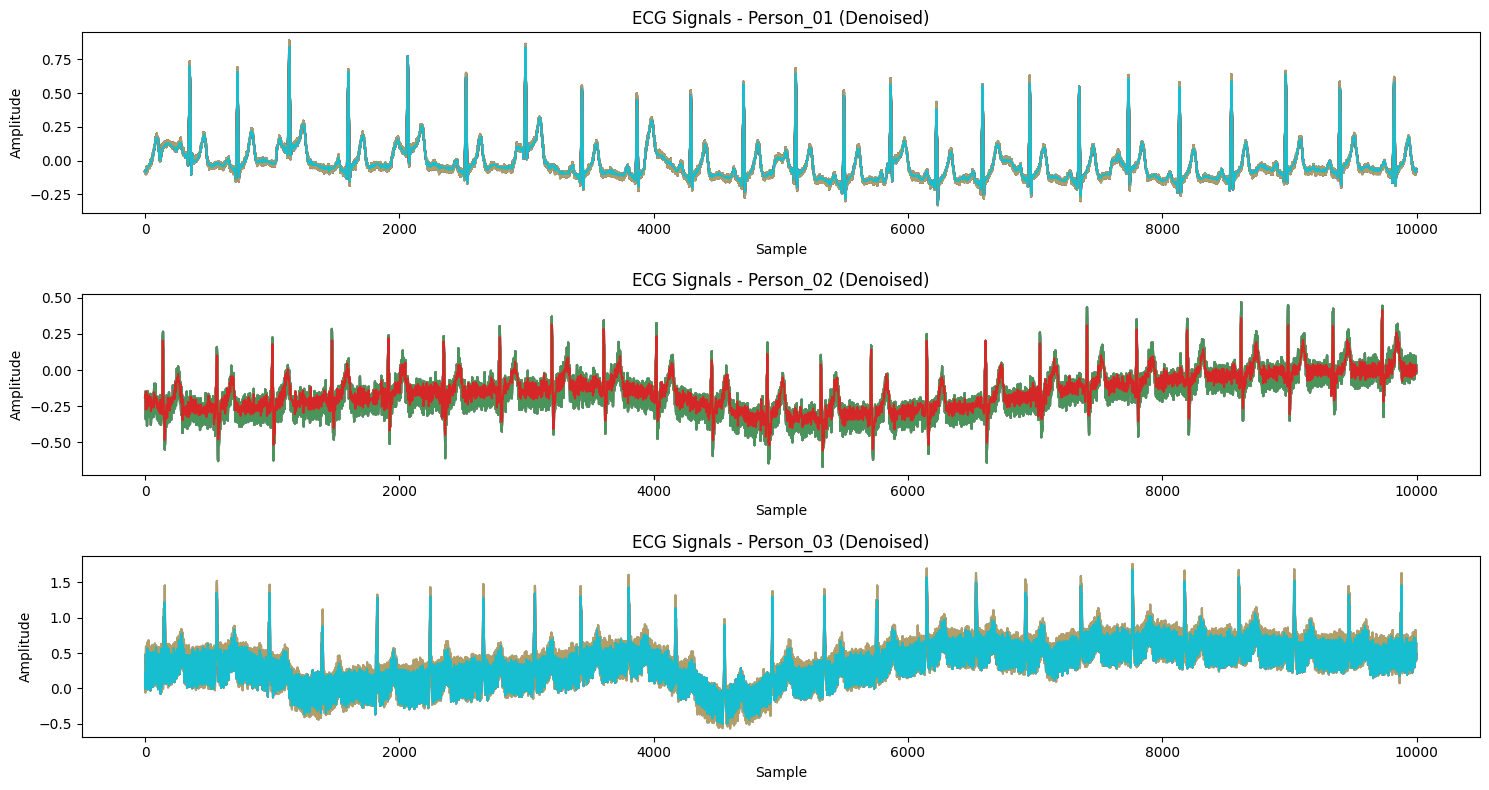

In [77]:
# Create side-by-side plots for the specified persons with denoised signals
plt.figure(figsize=(15, 8))

for i, person_name in enumerate(persons_to_include, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    person_directory = os.path.join(data_root, person_name)

    if os.path.exists(person_directory):
        # Plot and denoise records for the person
        plot_and_denoise_records(person_directory, person_name)

        plt.title(f'ECG Signals - {person_name} (Denoised)')
        plt.xlabel('Sample')
        plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [87]:
def plot_dat_files(directory, person_name):
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.dat'):
                # record_name = os.path.splitext(file)[0]  # remove the '.dat' extension
                record_name = 'rec_1'
                record_path = os.path.join(root, record_name)

                # Read the header to get information about the recording
                header = wfdb.rdheader(record_path)

                # Read the record from .dat file
                record_signals, _ = wfdb.rdsamp(record_path)

                # Plot the signals
                for channel in range(record_signals.shape[1]):
                    plt.plot(record_signals[:, channel], label=f'{person_name} - Record {record_name} - Channel {channel + 1}')

                plt.title(f'ECG Signals - {person_name} - Record {record_name}\nSample Frequency: {header.fs} Hz, Channels: {len(header.sig_name)}')
                plt.xlabel('Sample')
                plt.ylabel('Amplitude')

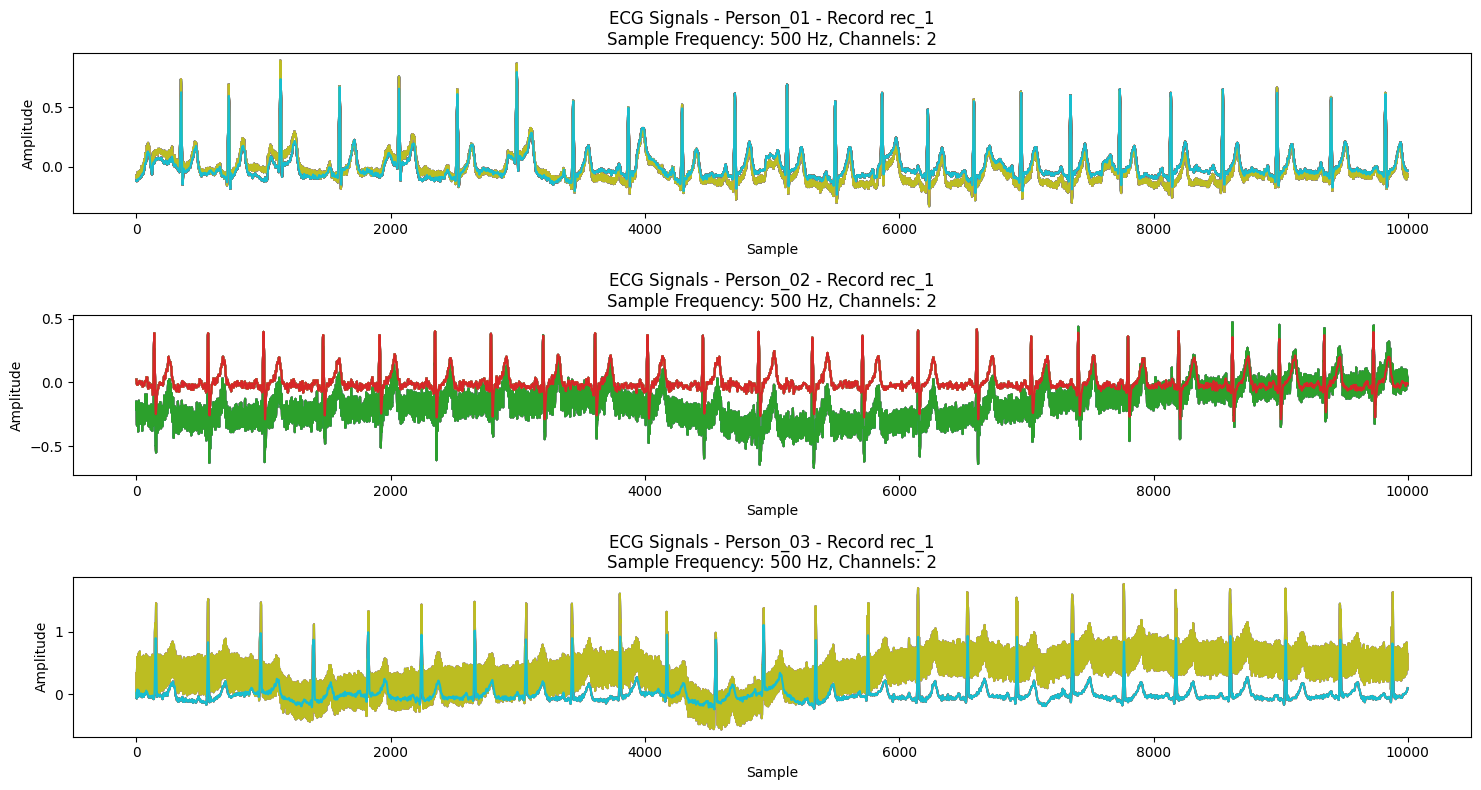

In [88]:
plt.figure(figsize=(15, 8))

for i, person_name in enumerate(persons_to_include, 1):
    plt.subplot(3, 1, i)  # 3 rows, 1 column, ith subplot
    person_directory = os.path.join(data_root, person_name)

    if os.path.exists(person_directory):
        # Plot and denoise records for the person from .dat files
        plot_dat_files(person_directory, person_name)

plt.tight_layout()
plt.show()